<a href="https://colab.research.google.com/github/hung7405/Machine-Learning-Project/blob/main/Salary_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data and check the information of the Dataset**


In [462]:
#Importing Libraries
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Saving Salary_Data.csv to Salary_Data (15).csv


In [463]:
#Importing Data
df = pd.read_csv('Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [465]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


# **Cleaning Data**

In [466]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [467]:
df.dropna(inplace=True)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [469]:
pd.options.display.max_rows = 50
df['Job Title'].value_counts()
# df['Job Title'].nunique()

,count
Job Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Junior Research Scientist,1
Senior Product Development Manager,1
Junior Social Media Specialist,1


In [470]:
#Reducing job titles by omitting titles with les than 5 counts
job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=5]
job_title_edited.count()

np.int64(125)

In [471]:
# Omitting titles with less than 5 counts

df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()


67

In [472]:
count_other = (df['Job Title'] =='Others').sum()
print(count_other)

215


In [473]:
# Checking unique value count of Education level
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2265
Master's Degree,1572
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


In [474]:
df['Education Level'].replace(["Bachelor's Degree", "Master's Degree", "phD"], ["Bachelor's", "Master's", "PhD"],inplace=True)
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's,3021
Master's,1860
PhD,1369
High School,448


In [475]:
df['Gender'].value_counts()

,count
Gender,
Male,3671
Female,3013
Other,14


In [476]:
df['Salary'].value_counts()

,count
Salary,
140000.0,287
120000.0,282
160000.0,276
55000.0,251
170000.0,231
...,...
144496.0,1
193746.0,1
122581.0,1


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


# **EDA (Exploratory Data Analysis)**

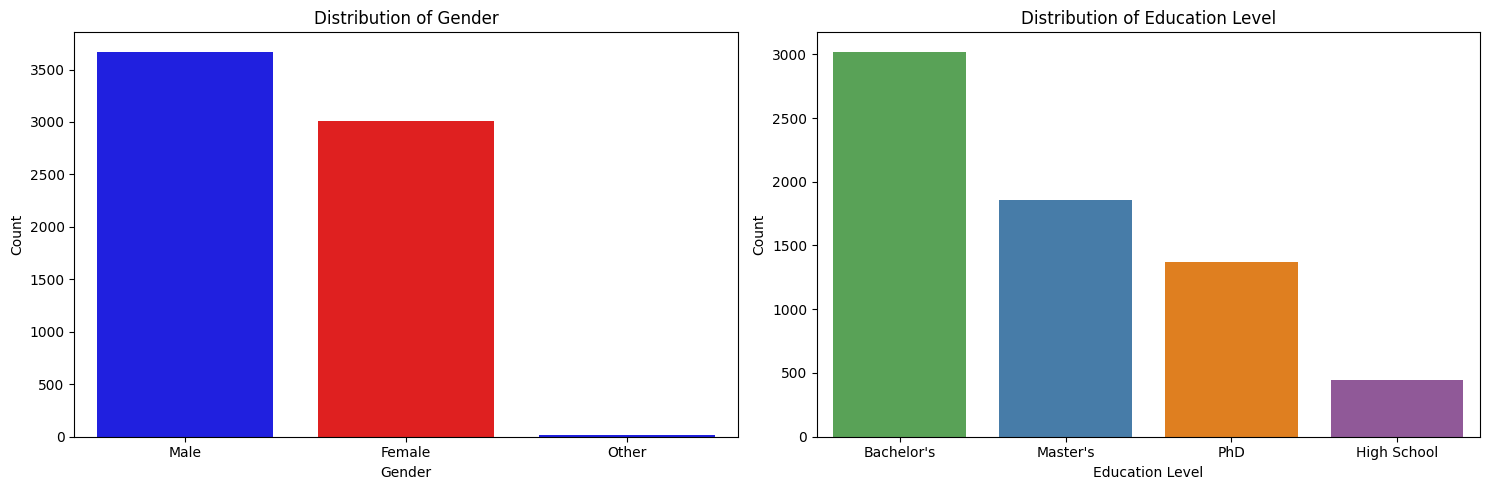

In [478]:
gender_colors = ['blue', 'red']
education_colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3']

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize= (15,5))

#First plot: Count of data point for each gender
sns.countplot (x='Gender', data = df, ax = ax[0], palette=gender_colors)

#Second plot: Count of data point for each Educational level
sns.countplot(x='Education Level', data = df, ax = ax[1], palette= education_colors)

#Add label and titles for the subplots (0)
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

#Add label and titles for the subplot (1)
ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

#Show plot
plt.tight_layout()
plt.show()

## **Distribution of Gender and Education Level**
1. **Distribution of Gender:** The job market is mostly dominated by males and females with values respectively approximately 36000 data points and about 3000 data points. There "Other" category is extremely small.

 This plot shows that while women are slowly becoming a part of the workforce, people belonging to other genders do have very few opportunities.

2. **Distribution of Education Level:** The plot for the "Distribution of Education Level" shows that the workforce is highly educated. A clear majority of working professionals hold a Bachelor's degree, estimated at $\approx 3,000$ individuals, making it the most prevalent qualification. This is followed by Master's ($\approx 1,850$) and PhD holders ($\approx 1,400$). Crucially, High School graduates are the least represented group, estimated at only $\approx 450$ individuals.

This plot indicates that a Bachelor's degree is generally seen as the sufficient entry point and is the educational attainment most in demand by employers in this market.





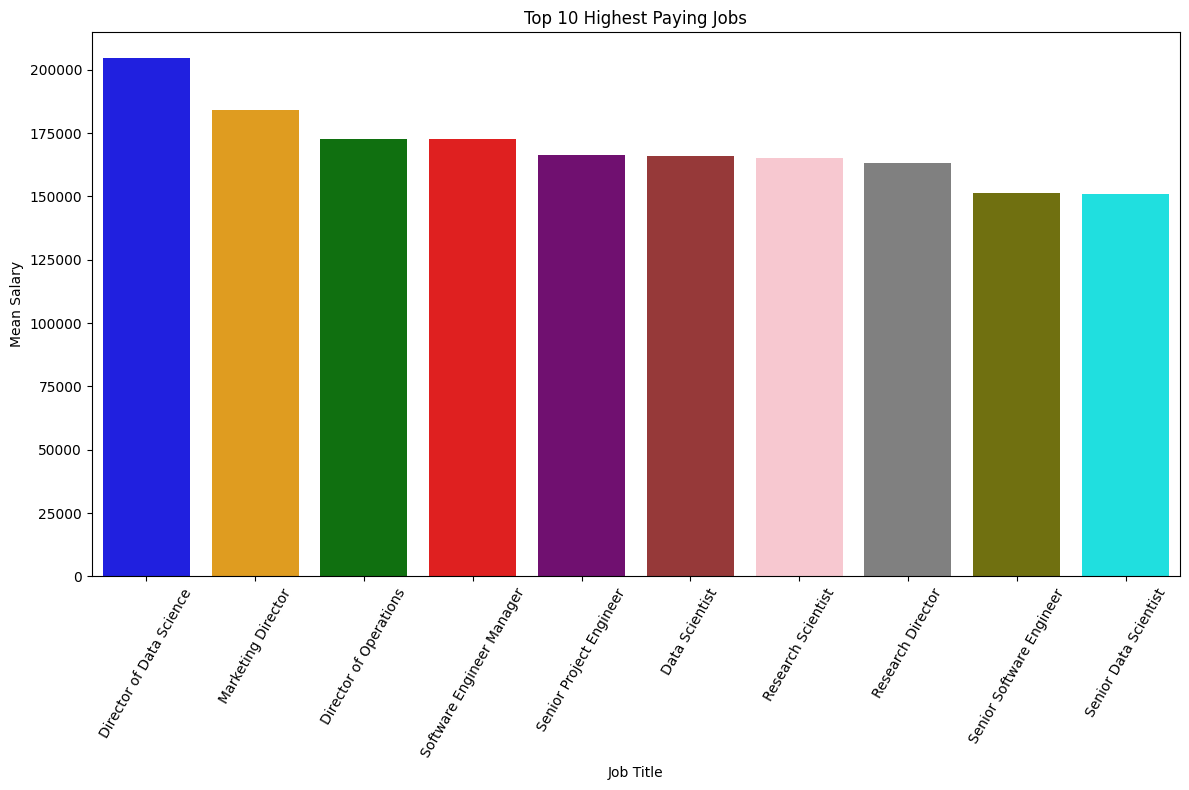

In [479]:
salary_colors =['blue', 'orange', 'green', 'red','purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
#Top 10 job title with the highest mean salary
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

#Bar plot for the top 10 highest mean paying job title
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values, palette=salary_colors)

# Add label for Bar chart
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)

# Show the plot
plt.tight_layout()
plt.show()

## **Top 10 Highest Mean Salaries**
The analysis of the mean salaries reveals that the highest-paying roles are dominated by Director and Senior-level positions in specialized technical and managerial fields. The Director of Data Science commands the highest mean salary, exceeding $200,000. All roles in the top 10 are highly compensated, which mean salaries consistently ranging from approximately 150,000 to 200,000 dollars which highlights a strong demand for leadership and expertise in areas Data Science, Marketing,Software Engineering, and Operations Management.


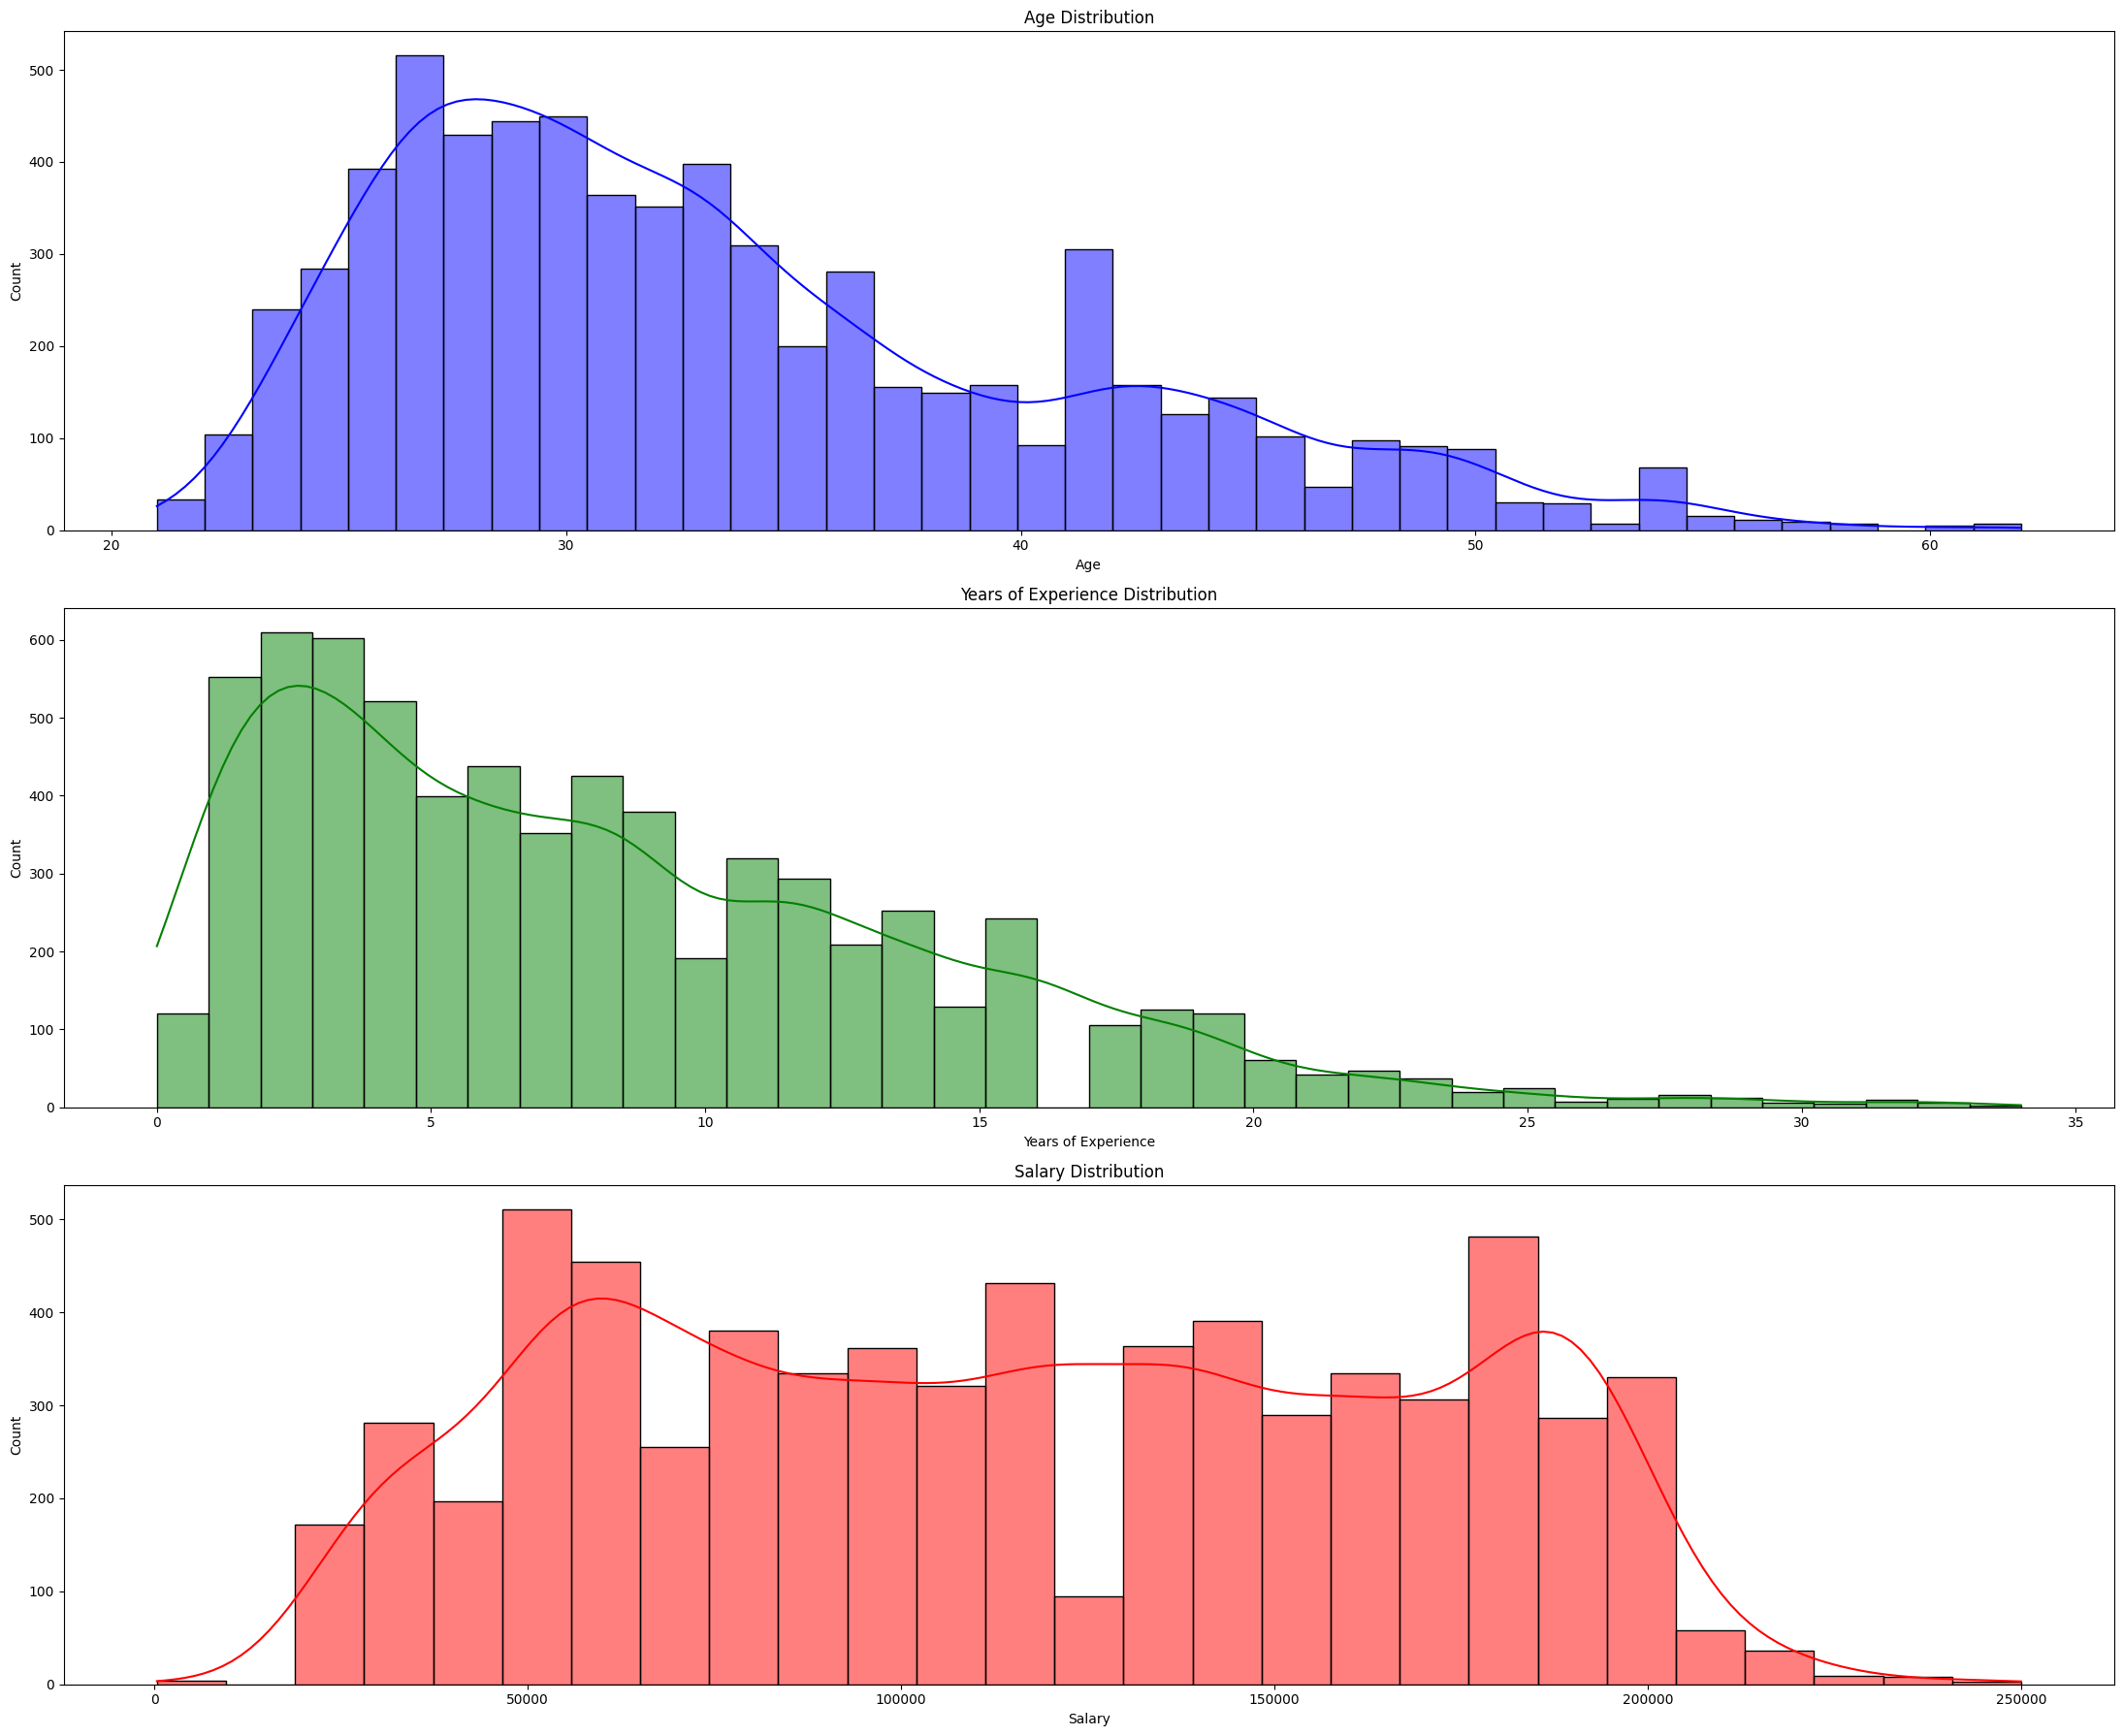

In [480]:
#Create a figure with 3 subplots
fig, ax = plt.subplots(3, 1, figsize=(22, 18))

# First plot: Histogram of Age
sns.histplot(df['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Second plot: Histogram of Years of Experience
sns.histplot(df['Years of Experience'], ax=ax[1], color='green', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Third plotl: Histogram of Salary
sns.histplot(df['Salary'], ax=ax[2], color='red', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()

## **Distribution of continuous variables**
1. **Age Distribution:**  The highest concentration of professionals age falls between 25 and 30 years old, with the count peaking well over 400 in this range. As age increases past 40, the count drops significantly, suggesting a high turnover or fewer older professionals in this particular dataset.

The Age Distribution is left-skewed, indicating the workforce is generally young

2. **Years of Experience Distribution:** The experience level mirrors the age profile, being heavily right-skewed toward low experience. The count peaks sharply at 2 to 5 years of experience, where the bar heights are highest (over 300).

The distribution rapidly tails off, showing that while some professionals have 20+ years of experience, the majority of the workforce is relatively junior.

3. **Salary Distribution:** The Salary Distribution is multi-modal, displaying several distinct clusters rather than a single peak. There are high concentrations of workers in the $30,000–$50,000 range (likely entry-level) and another large cluster around the $180,000–$250,000 range (likely senior/executive roles).

This wide distribution suggests the dataset covers a broad spectrum of roles, from starting positions to highly compensated expert positions.

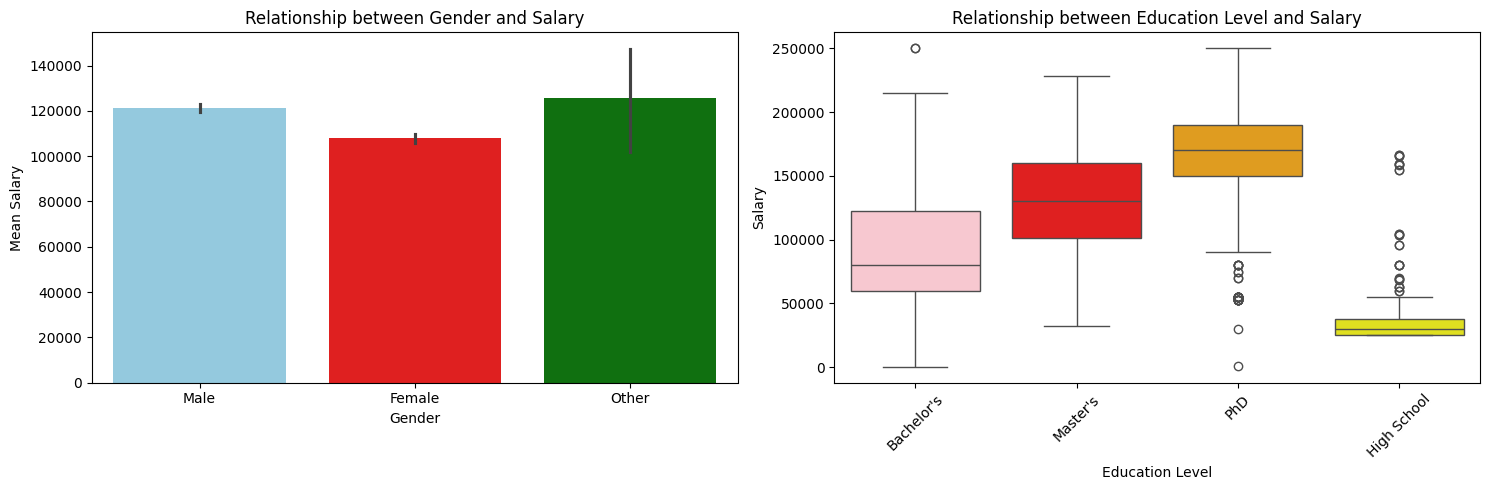

In [481]:
gender_salary_colors = ['skyblue', 'red', 'green']
education_salary_colors = ['pink', 'red', 'orange', 'yellow']
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# First plot: Bar chart for identifying the relationship between Gender and Salary
sns.barplot(x='Gender', y='Salary', data=df, ax=ax[0], palette=gender_salary_colors)
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

# Second plot: Box plot for the relationship between Education Level and Salary
sns.boxplot(x='Education Level', y='Salary', data=df, ax=ax[1], palette=education_salary_colors)
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')

# Rotate x-axis labels in the second subplot for better readability
ax[1].tick_params(axis='x', rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

## **Relationship between discreet variables**
1. **Gender and Salary:**  Male professionals show a higher mean salary ($\approx \$120,000$) compared to Female professionals ($\approx \$108,000$), suggesting a mean salary gap exists within this dataset. Although the 'Other' category displays the highest mean salary, its large error bar implies high variability, likely stemming from a very small sample size in the overall data.

The bar chart indicates that the mean salaries for the three gender categories are relatively similar, all falling in the 108,000 dollars to 125,000 dollars range.

2. **Education level and Salary:**  PhD holders command the highest median salary ($\approx \$170,000$) and the largest range of high earnings, closely followed by Master's degree holders. Conversely, High School graduates have the lowest median salary ($\approx \$35,000$) and the smallest pay range.

The box plot clearly illustrates a strong positive correlation between higher educational attainment and salary. This shows that advanced degrees provide a significant financial return for professionals in this field.

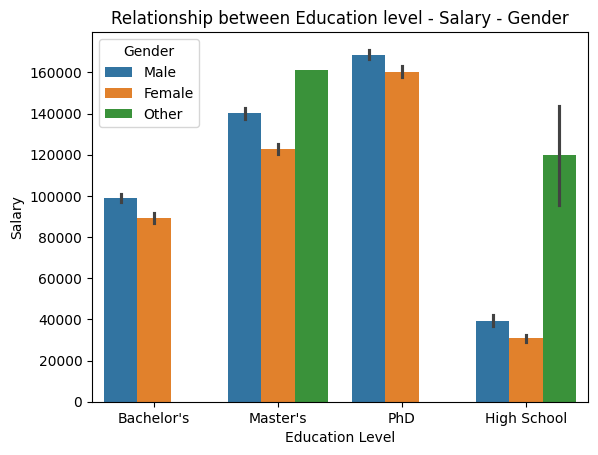

In [482]:
#Bar chart to identify the relationship between 2 independent variables: Education level, Gender and dependent variable: Salary
sns.barplot(x='Education Level',y='Salary',data=df,hue='Gender').set(title='Relationship between Education level - Salary - Gender')
plt.show()

## **Relationship between Education Level - Salary - Gender**
The chart demonstrates a clear and strong positive correlation between education and salary across all gender groups. For instance, PhD holders consistently earn the highest mean salaries, with Male PhD holders leading at approximately $170,000. Conversely, the lowest salaries are observed at the High School level, with Female High School graduates earning the least. However this relationship suggests that while advanced education provides a significant financial return regardless of gender, a noticeable salary gap persists within each education level, with males generally showing a higher mean salary than females at most degree levels. To conclude, the more you are educated, the more you are paid.

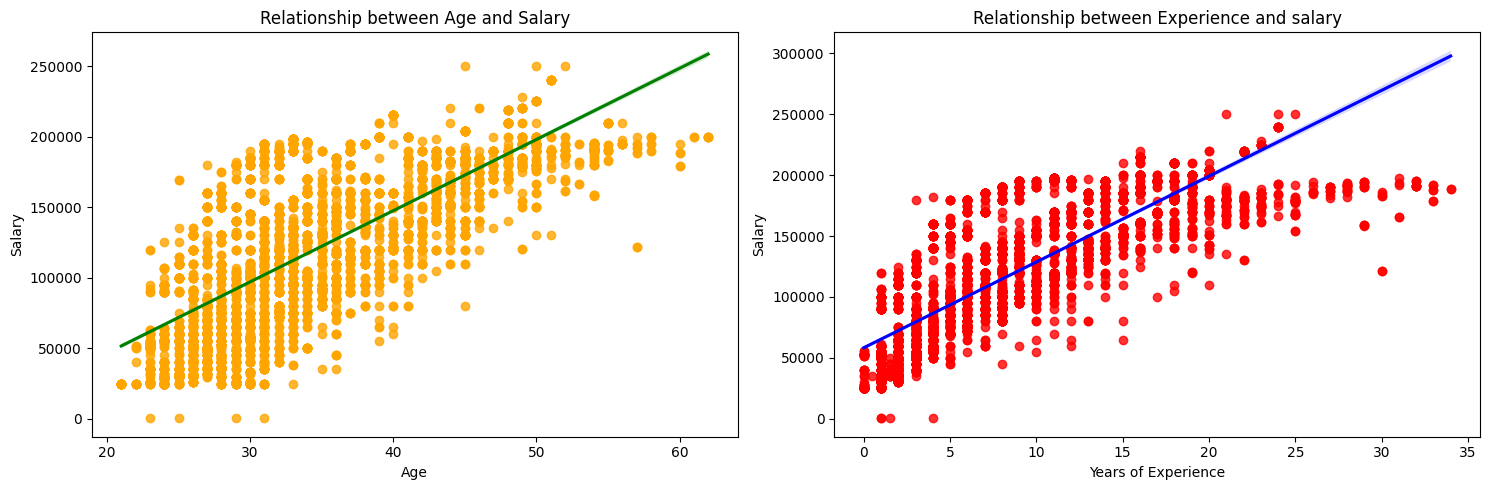

In [483]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# First plot: Scatter plot for Relationship between Age and Salary
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Second plot: Scatter plot for Relationship between Experience and Salary
sns.regplot(x='Years of Experience',y='Salary',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

#Show the plots
plt.tight_layout()
plt.show()

1. **Relationship between Age and Salary:** The scatter plot shows a strong positive linear relationship between Age and Salary. As a professional's age increases, their salary tends to increase significantly, as illustrated by the steep green regression line. While the data points are widely scattered (indicating high variance in salary at any given age).

 The Relationship of Age and Salary clearly shows upward trend, suggesting that age is a strong predictor of higher earning potential in this workforce.

2. **Relationship between Experience and Salary:** Similar to age, the scatter plot demonstrates a strong positive linear relationship between Years of Experience and Salary. The blue regression line shows a steep incline, meaning that gaining more experience directly correlates with a substantial increase in salary.

This strong correlation highlights that in this field, experience is highly valued and acts as a primary driver for career progression and financial compensation, especially in the early to mid-career stages.

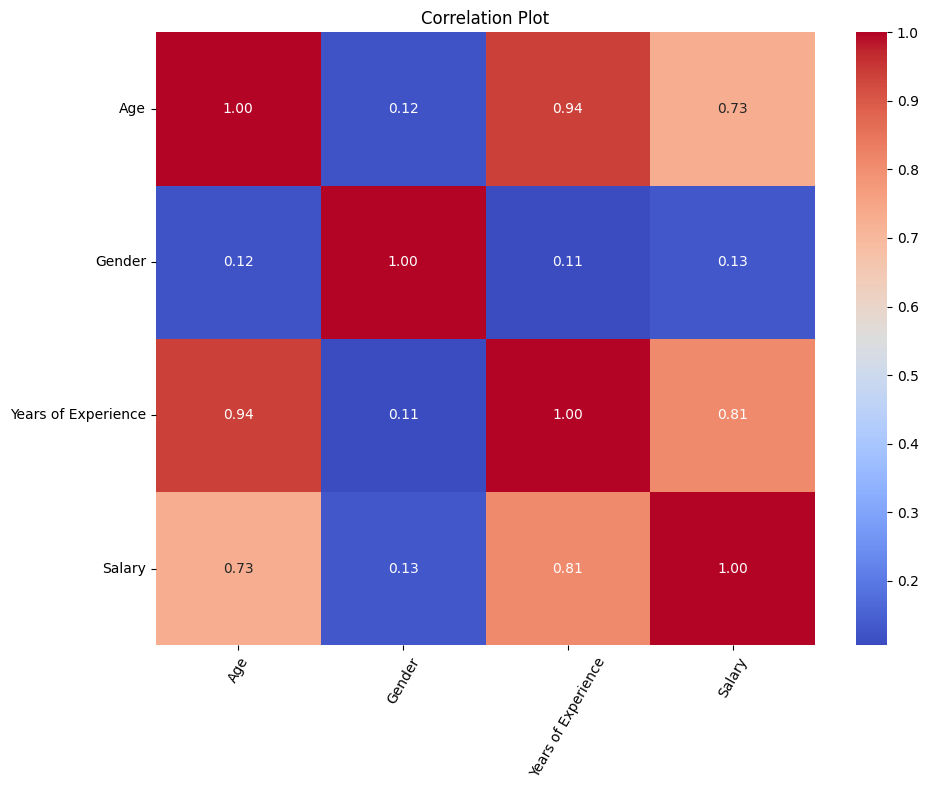

In [484]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
# df['Education Level'] = df['Education Level'].map({"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3})
heatmap_cols_need = ['Age', 'Gender', 'Years of Experience', 'Salary']

# Correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(df[heatmap_cols_need].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.tight_layout()


plt.show()

## **Heatmap**

The heatmap reveals the degree of correlation between 4 variables ( Age - Gender - Year of Experience - Salary):

1. Highest correlation between age and years of experience: **0.94**

2. High correlation between salary and years of experience: **0.81**

3. High correlation between salary and age: **0.73**

4. Low correlation between gender and all variables:  **0.12** for Age, **0.11** for Year of Experience, **0.13** for Salary

#**Predicting Salary**

In this ML part, there are 3 models will be used to compare and predict the salary:
1. Linear Regression
2. Decision Tree
3. Random Forest

In [485]:
# detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Caltulation Interquartile
IQR = Q3-Q1

# Deetecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [486]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**There is no outliers in Q3**

In [487]:
df[df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**There is no outliers in Q1**

## **Preparing the data for ML analysis by converting categorical job titles into a numerical format**

In [488]:
education_mapping = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
df['Education Level'] = df['Education Level'].map(education_mapping)
# Creating dummies for Job titles
dummies = pd.get_dummies(df['Job Title'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

# Drop Job Title column
df.drop('Job Title',inplace=True,axis=1)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Content Marketing Manager,Customer Service Representative,Data Analyst,Data Scientist,Digital Marketing Manager,...,Senior Product Marketing Manager,Senior Project Engineer,Senior Project Manager,Senior Research Scientist,Senior Software Engineer,Social Media Manager,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,32.0,1,1,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,28.0,0,2,3.0,65000.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,1,3,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,0,1,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,1,2,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [489]:
# Separating the dataset into features and target

# Dataset conntaining all features from df
features = df.drop('Salary',axis=1)

# Series containing target variable to be predicted
target = df['Salary']

In [490]:
# Splitting data into 20% testing and 80% training sets

x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.8,random_state=0)
x_train.shape

(5358, 70)

In [491]:
# Create a dictionary for defining models and tuning hyperparameters

model_params = {
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{

        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[2,4,6,8,10],
            'random_state':[0,42],
            'min_samples_split':[1,5,10,20]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    }
}

In [492]:
# Hyper parameter tuning through grid search cv
score=[]

for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    clf.fit(x_train,y_train)

    score.append({
        'Model':model_name,
        'Params':clf.best_params_,
        'MSE(-ve)':clf.best_score_
    })
pd.DataFrame(score)

,Model,Params,MSE(-ve)
0,Linear_Regression,{},-4.698626e+08
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 5, 'ran...",-1.589966e+08
2,Random_Forest,{'n_estimators': 80},-7.212755e+07


The correct order from Best to Worst based on the Negative Mean Squared Error (MSE(-ve)) scores is indeed:
1. Random Forest
2. Decision Tree
3. Linear Regression

In [494]:
# Random Forest model

rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20)

In [500]:
rfr.score(x_test,y_test)

0.9777491345101654

**This score indicates that the model explains 97.7% of the variability in the salary data, confirming an excellent fit.**

In [511]:
y_pred_rfr = rfr.predict(x_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_rfr))
rmse_rfr= np.sqrt(mean_squared_error(y_test,y_pred_rfr))
print("Root Mean Squared Error :",rmse_rfr)

Mean Squared Error : 63652583.66186052
Mean Absolute Error : 3153.311230062091
Root Mean Squared Error : 7978.256931301506


## **Model Performance:**
1. Mean squared error: This value represents the average of the squared errors, which severely penalizes large errors and is primarily used as an intermediate step to calculate RMSE.
2. Mean absoltute error: On average, the model's predicted salary deviates from the actual salary by only $3,153.31, showing high accuracy in predictions.

3. Root mean squared error: This metric is in the same unit as the salary (dollars); it means the typical prediction error is $7,978.27.

In [502]:
# Decision Tree model

dtr = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [507]:
dtr.score(x_test,y_test)

0.9462985337453707

**This score indicates that the model explains 94.6% of the variability in the salary data, confirming an strong fit.**

In [512]:
y_pred_dtr = dtr.predict(x_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_dtr))
rmse_dtr= np.sqrt(mean_squared_error(y_test,y_pred_dtr))
print("Root Mean Squared Error :",rmse_dtr)

Mean Squared Error : 153622656.83997813
Mean Absolute Error : 7489.434066832021
Root Mean Squared Error : 12394.46073211651


## **Model Performance:**
1. Mean squared error: This value heavily penalizes large errors by squaring them; it is mainly used as an intermediate step to calculate RMSE.

2. Mean absoltute error: The average prediction error is $7,489.43, meaning the model's prediction is off by this amount on average.

3. Root mean squared error: The typical prediction error, in dollars, is $12,394.46, representing the standard magnitude of the error.

In [513]:
# Linear regression model

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [515]:
lr.score(x_test,y_test)

0.8465361683280285

**This score indicates that the model explains 84.% of the variability in the salary data, confirming an good fit.**

In [517]:
y_pred_lr = lr.predict(x_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_lr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_lr))
rmse_lr= np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("Root Mean Squared Error :",rmse_lr)

Mean Squared Error : 439010760.6840087
Mean Absolute Error : 15046.416603435264
Root Mean Squared Error : 20952.58362789679


## **Model Performance:**
1. Mean squared error: This large value represents the average of the squared errors; it is primarily used to calculate RMSE

2. Mean absoltute error: The average prediction error is $15,046.42. This error is high, suggesting this model is less accurate than the tree-based models.

3. Root mean squared error: The typical prediction error, in dollars, is $20,952.58, reflecting the large magnitude of errors in LR's predictions.

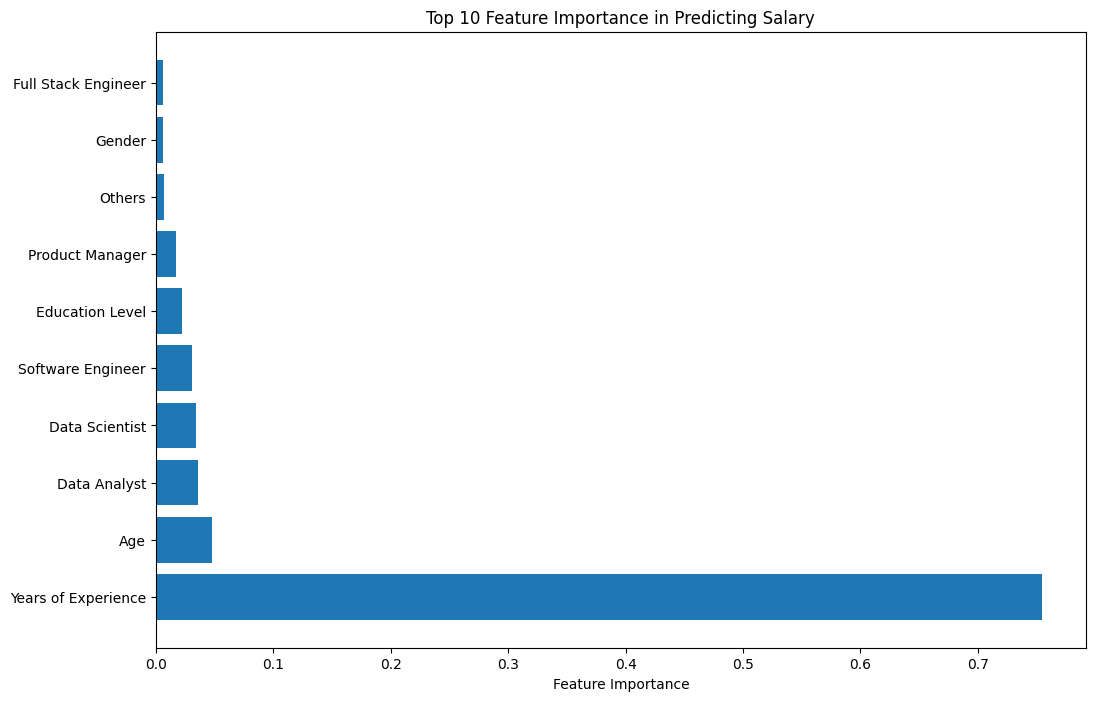

In [520]:
# Access Random Forest Regressor's feature importances
feature_importances = rfr.feature_importances_

# Assume you have a list of feature names that corresponds to the feature importances
feature_names = list(x_train.columns)

# Sort in decending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot: Bar chart to see Top 10 Feature Importance in Predicting Salary
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names[:10], sorted_feature_importances[:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance in Predicting Salary')

#Show plot
plt.show()

**This bar chart indicates Top 10 Importance feature in Predicting Salary. The best contribution is from 'Year of Experience' and the least contribution feature is 'Gender'.**

# **Conclusion**

The evaluation of the three regression models reveals a significant difference in predictive accuracy:
1. **The Random Forest Regressor:** demonstrated superior performance, achieving the highest $R^2$ score ($\approx 0.977$) and the lowest error metrics (MAE $\approx \$3,153$). This indicates that the model explains the greatest amount of salary variance and provides the most reliable predictions.

2. **The Decision Tree Model:** performed well ($R^2 \approx 0.946$) but incurred significantly higher error than the Random Forest model.

3. **The Linear Regression Model:** showed the lowest performance ($R^2 \approx 0.846$) and the largest errors, suggesting that the non-linear relationships within the salary data are captured much more effectively by the tree-based models.

In conclusion, the Random Forest Regressor is the most suitable model for predicting salary on this dataset, offering the highest predictive accuracy and the lowest overall error.

# **Suggestion**

Recommedation for company:
1. **Model Focus and Deployment:** Officially deploy the Random Forest Regressor as the primary prediction engine due to its highest accuracy (MAE $\approx \$3,153$).

2. **Model Optimization:** Refine the Random Forest model using more efficient techniques like RandomizedSearchCV or Bayesian Optimization to achieve marginal gains in accuracy. Explore creating interaction terms (e.g., combining 'Years of Experience' and 'Education Level') to capture complex relationships and reduce prediction error further.

3. **Salary Policy Recommendation:** Design the compensation framework to heavily weight Years of Experience and Age (the most important features). This ensures the salary scale accurately reflects tenure and experience accumulation, which is crucial for talent retention and internal equity. Use the model's insights to standardize pay ranges across specific job titles, promoting fair and transparent compensation across the organization.